In [5]:
import pylab
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table

## Read tables

In [6]:
SWIRE_cat=Table.read('./data/dmu26_XID+MIPS_Bootes_cat.fits')

In [7]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_MIPS_24,FErr_MIPS_24_u,FErr_MIPS_24_l,Bkg_MIPS_24,Sig_conf_MIPS_24,Rhat_MIPS_24,n_eff_MIPS_24,Pval_res_24
,degrees,degrees,muJy,muJy,muJy,MJy / sr,MJy / sr,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J142532.010+323934.707,216.383375208803,32.6596409059389,3.432481,8.387222,0.89181817,-0.0013047275,4.913415e-06,0.9986426,2000.0,0.0
HELP_J142532.800+323945.723,216.38666555616197,32.662700727634004,-39.001587,-25.958603,-53.792427,-0.0013047275,4.913415e-06,1.0025071,2000.0,0.0
HELP_J142533.193+323941.822,216.38830235616197,32.661617327634,-29.605513,-15.073171,-44.363415,-0.0013047275,4.913415e-06,1.0059888,776.0,0.0
HELP_J142535.865+323854.257,216.3994360921625,32.64840483834955,19.40917,33.105164,7.6843433,-0.0013047275,4.913415e-06,1.0001347,1096.0,0.0
HELP_J142540.861+324026.226,216.42025485616196,32.673951727634,18.31059,33.506855,6.543136,-0.0020661626,5.005267e-06,1.0009118,2000.0,0.0
HELP_J142541.339+323925.955,216.42224695616198,32.657209627634,-6.903529,-1.9368844,-15.973758,-0.0020661626,5.005267e-06,1.0005563,2000.0,0.0
HELP_J142540.401+323948.506,216.41833815616198,32.663473927634,-12.98247,-4.0506277,-26.492723,-0.0020661626,5.005267e-06,1.0003942,2000.0,0.0
HELP_J142538.888+324021.250,216.41203535616197,32.672569527634,-3.1099455,-0.7689666,-7.426327,-0.0020661626,5.005267e-06,0.999253,2000.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

4.9971194


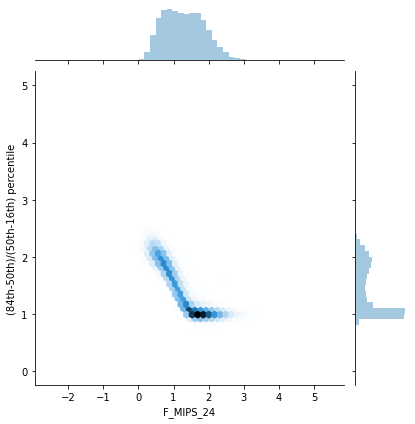

In [9]:
import seaborn as sns 
skew=(SWIRE_cat['FErr_MIPS_24_u']-SWIRE_cat['F_MIPS_24'])/(SWIRE_cat['F_MIPS_24']-SWIRE_cat['FErr_MIPS_24_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(SWIRE_cat['F_MIPS_24'][use]),y=skew[use], kind='hex')
print(np.max(skew[use]))
g.savefig('../../data/figs/sk_MIPS_Bootes.pdf', bbox='tight')
g.savefig('../../data/figs/sk_MIPS_Bootes.png', bbox='tight')


Both seem to have flux pdfs that become Gaussian at ~20$\mathrm{\mu Jy}$ 

In [11]:
10**1.3

19.952623149688797

## Add flag to catalogue

In [12]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_mips_24'))


In [13]:
ind_SWIRE=(SWIRE_cat['Pval_res_24']>0.5) | (SWIRE_cat['F_MIPS_24'] < 20.0)

In [14]:
SWIRE_cat['flag_mips_24'][ind_SWIRE]=True


In [10]:
SWIRE_cat.write('./data/dmu26_XID+MIPS_Bootes_cat_20190320.fits', format='fits',overwrite=True)